In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy
import seaborn as sns
from matplotlib import rcParams

In [240]:
train_auc = pd.read_csv(os.path.join("curves", "AUC_train.csv"))
val_auc = pd.read_csv(os.path.join("curves", "AUC_val.csv"))
test_auc = pd.read_csv(os.path.join("curves", "AUC_test.csv"))

train_loss = pd.read_csv(os.path.join("curves", "loss_train.csv"))
val_loss = pd.read_csv(os.path.join("curves", "loss_val.csv"))
test_loss = pd.read_csv(os.path.join("curves", "loss_test.csv"))

In [241]:
def draw_curves(df, ylabel, title, filename):
    fig, ax = plt.subplots(figsize=(5,4))
    ax.plot(df)
    ax.legend(df.columns)
    # plt.title(title)
    ax.set_ylabel(ylabel)
    plt.xlabel("epoch")
    plt.xticks([i * 2 for i in range(10)])
    plt.xlim(left=0, right=19)
    plt.rc('text', usetex=False)
    # plt.rc('font', family='serif')
    plt.tight_layout()
    plt.savefig(os.path.join("..", "media", f"{filename}.png"))
    plt.show()

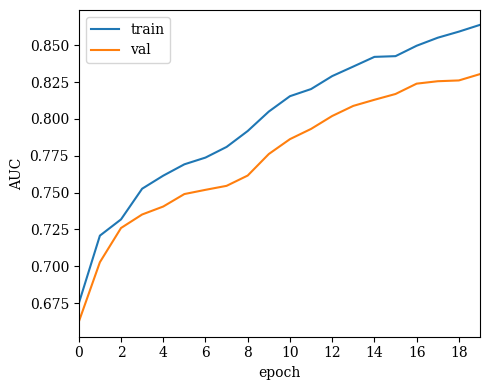

In [242]:
df = pd.DataFrame({
    "train": train_auc["Value"],
    "val": val_auc["Value"]
})

draw_curves(df, "AUC", "AUC Curves", "auc_curve_train_val")

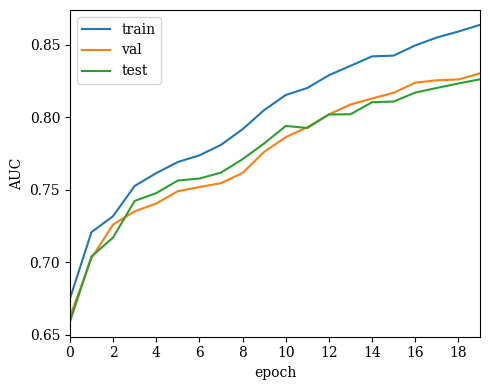

In [243]:
df2 = pd.DataFrame({
    "train": train_auc["Value"],
    "val": val_auc["Value"],
    "test": test_auc["Value"]
})

draw_curves(df2, "AUC", "AUC Curves", "auc_curve_train_val_test")

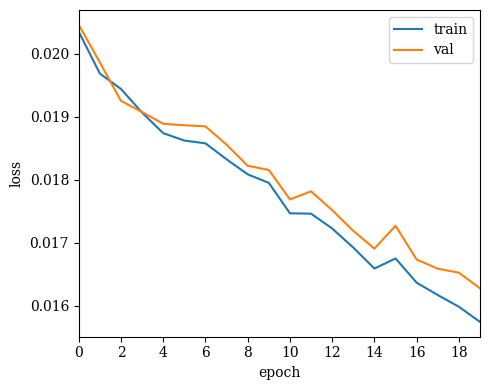

In [244]:
df3 = pd.DataFrame({
    "train": train_loss["Value"],
    "val": val_loss["Value"]
})

draw_curves(df3, "loss", "Loss Curves", "loss_curve_train_val")

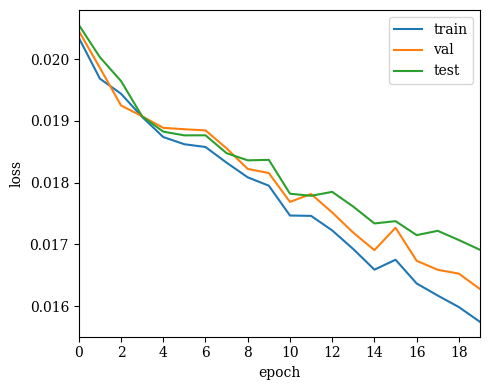

In [245]:
df4 = pd.DataFrame({
    "train": train_loss["Value"],
    "val": val_loss["Value"],
    "test": test_loss["Value"]
})

draw_curves(df4, "loss", "Loss Curves", "loss_curve_train_val_test")

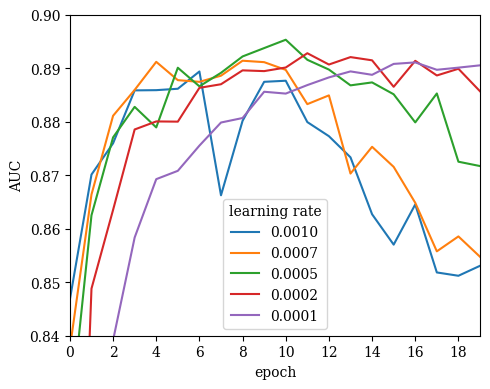

In [246]:
val_auc2_0007 = pd.read_csv(os.path.join("curves", "CRNN_bs=32_lr=0.0007_0_AUC_val.csv"))
val_auc2_0005 = pd.read_csv(os.path.join("curves", "CRNN_bs=32_lr=0.0005_0_AUC_val.csv"))
val_auc2_0002 = pd.read_csv(os.path.join("curves", "CRNN_bs=32_lr=0.0002_0_AUC_val.csv"))
val_auc2_0001 = pd.read_csv(os.path.join("curves", "CRNN_bs=32_lr=0.0001_0_AUC_val.csv"))
val_auc2_001 = pd.read_csv(os.path.join("curves", "CRNN_bs=32_lr=0.001_0_AUC_val.csv"))
df5 = pd.DataFrame({
    "0.0010": val_auc2_001["Value"],
    "0.0007": val_auc2_0007["Value"],
    "0.0005": val_auc2_0005["Value"],
    "0.0002": val_auc2_0002["Value"],
    "0.0001": val_auc2_0001["Value"],
})

fig, ax = plt.subplots(figsize=(5,4))

ax.plot(df5)
ax.legend(df5.columns)
ax.get_legend().set_title("learning rate")   

ax.set_ylim(bottom=0.84, top=0.90)
# plt.rc('text', usetex=False)
# plt.rc('font', family='serif')
# plt.title(title)
ax.set_ylabel("AUC")
plt.xlabel("epoch")
plt.xticks([i * 2 for i in range(10)])
plt.xlim(left=0, right=19)
plt.tight_layout()
plt.savefig(os.path.join("..", "media", f'test.png'))
plt.show()